<a href="https://colab.research.google.com/github/ArlenNgahu/DSA2040A_ETL_Midterm_Arlen_855/blob/main/DSA4020_MT%2BTerm_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Translation for Kenyan Public Service Announcements (PSAs)**
Course: DSA 4020 — Natural Language Processing
Student: Arlen Ngahu 667855
Omar
Year: 2025

Objective:
Build a dataset of Public Service Announcements (PSAs) and train an English → Local Languages machine translation system (Swahili, Somali, Kikuyu) using transformer models.

In [ ]:
# Install dependencies
!pip install pandas numpy matplotlib seaborn wordcloud nltk fasttext transformers sacrebleu sentencepiece datasets --quiet
!pip install openpyxl --quiet
!{sys.executable} -m pip install transformers
!{sys.executable} -m pip install sentencepiece
!{sys.executable} -m pip install sacremoses
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
import sys
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 13.4 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Load Dataset

In [ ]:
import pandas as pd

df = pd.read_excel("/content/PSA_Eng.xlsx")
df.head()

,PSA_ID,Subcategory,English_text
0,PSAEd0001,Educational Resources,KNEC has released the 2025 KCSE examination ti...
1,PSAEd0002,Access to Education,"Schools reopen on January 6, 2025 for Term 1 o..."
2,PSAEd0003,Access to Education,Parents must register Grade 6 learners for KPS...
3,PSAEd0004,Educational Resources,Download KPSEA sample papers from the KNEC CBA...
4,PSAEd0005,Educational Resources,Tune in to EduTV Channel daily from 8:00 AM to...


**Exploratory Data Analysis (EDA)**

In [ ]:
# Dataset overview
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PSA_ID        601 non-null    object
 1   Subcategory   601 non-null    object
 2   English_text  601 non-null    object
dtypes: object(3)
memory usage: 14.2+ KB


,PSA_ID,Subcategory,English_text
count,601,601,601
unique,601,5,601
top,PSAEd0601,Access to Education,Final rollout: Inclusive education policy now ...
freq,1,139,1


In [ ]:
# Check missing values
df.isnull().sum()


,0
PSA_ID,0
Subcategory,0
English_text,0


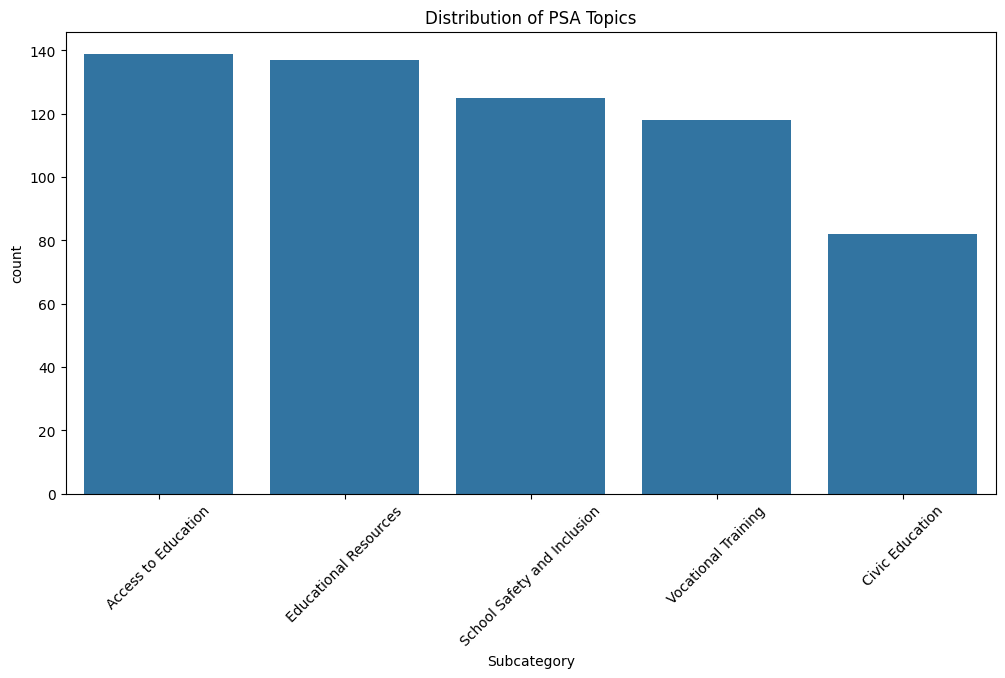

In [ ]:
# Distribution of topics
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Subcategory', order=df['Subcategory'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of PSA Topics")
plt.show()

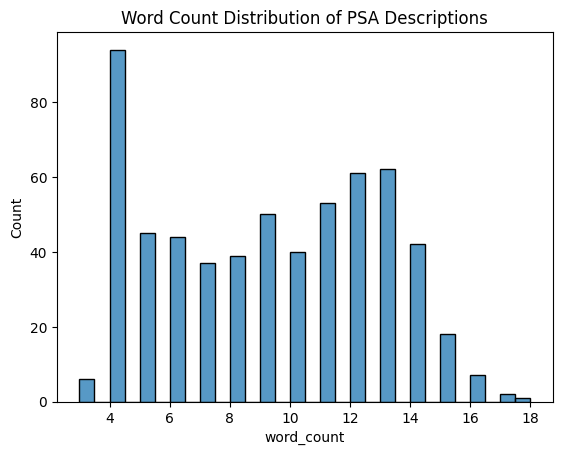

In [ ]:
# Word count distribution
df['word_count'] = df['English_text'].str.split().str.len()

sns.histplot(df['word_count'], bins=30)
plt.title("Word Count Distribution of PSA Descriptions")
plt.show()

**Text Preprocessing**

In [ ]:
stop_words = set(stopwords.words('english'))

def clean(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)        # remove URLs
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text) # remove punctuation
    text = " ".join([w for w in text.split() if w not in stop_words])
    return text

df['clean_text'] = df['English_text'].astype(str).apply(clean)
df.head()

,PSA_ID,Subcategory,English_text,word_count,clean_text
0,PSAEd0001,Educational Resources,KNEC has released the 2025 KCSE examination ti...,11,knec released 2025 kcse examination timetable ...
1,PSAEd0002,Access to Education,"Schools reopen on January 6, 2025 for Term 1 o...",13,schools reopen january 6 2025 term 1 academic ...
2,PSAEd0003,Access to Education,Parents must register Grade 6 learners for KPS...,12,parents must register grade 6 learners kpsea f...
3,PSAEd0004,Educational Resources,Download KPSEA sample papers from the KNEC CBA...,10,download kpsea sample papers knec cba portal
4,PSAEd0005,Educational Resources,Tune in to EduTV Channel daily from 8:00 AM to...,15,tune edutv channel daily 800 1000 cbc lessons


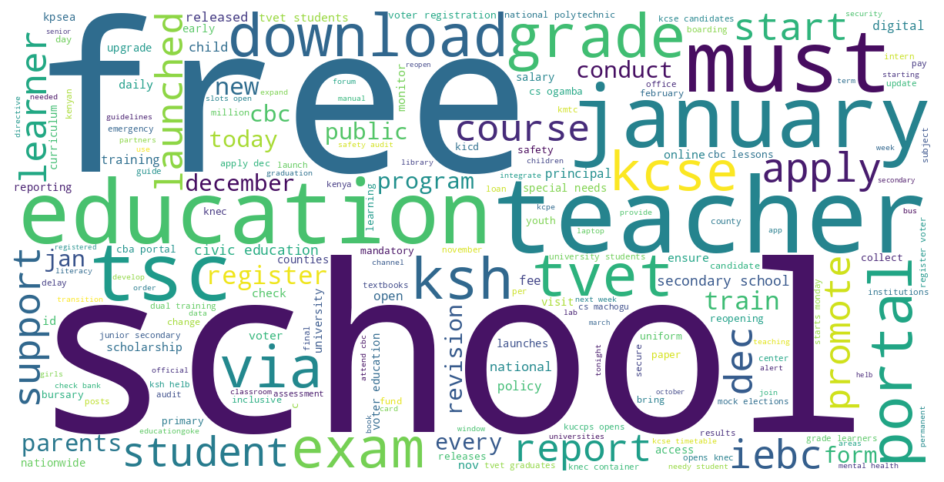

In [ ]:
# Word cloud
text = " ".join(df["clean_text"].dropna().tolist())
wc = WordCloud(width=1200, height=600, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

**NLP Feature Extraction**

In [ ]:
!python -m spacy download en_core_web_sm --quiet
nlp = spacy.load("en_core_web_sm")

def extract_pos(text):
    doc = nlp(text)
    return " ".join([f"{tok.text}/{tok.pos_}" for tok in doc])

df['POS'] = df['clean_text'].apply(extract_pos)
df[['clean_text','POS']].head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 54.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


,clean_text,POS
0,knec released 2025 kcse examination timetable ...,knec/PROPN released/VERB 2025/NUM kcse/NOUN ex...
1,schools reopen january 6 2025 term 1 academic ...,schools/NOUN reopen/PROPN january/PROPN 6/NUM ...
2,parents must register grade 6 learners kpsea f...,parents/NOUN must/AUX register/VERB grade/NOUN...
3,download kpsea sample papers knec cba portal,download/PROPN kpsea/ADJ sample/NOUN papers/NO...
4,tune edutv channel daily 800 1000 cbc lessons,tune/PROPN edutv/PROPN channel/NOUN daily/PROP...


**PSA Classifier: Transformer-Based**

We used DistilBERT to accurately gauge which ones are PSA's and which are not


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving psa_training.xlsx to psa_training (1).xlsx
Saving Potential_PSAs.xlsx to Potential_PSAs (1).xlsx


In [ ]:
import pandas as pd

# Try reading each file separately
try:
    train_df = pd.read_excel("psa_training.xlsx")
    print("TRAINING DATA LOADED ✓")
    print(train_df.head(), train_df.columns, train_df.dtypes)
except Exception as e:
    print("Failed loading psa_training.xlsx:", e)

print("---------------------------------------------------------")

try:
    potential_df = pd.read_excel("Potential_PSAs.xlsx")
    print("POTENTIAL PSA FILE LOADED ✓")
    print(potential_df.head(), potential_df.columns)
except Exception as e:
    print("Failed loading Potential_PSAs.xlsx:", e)


TRAINING DATA LOADED ✓
                                                Text  Value
0  [Official Circular] This circular should be di...      0
1  Schools reopen on January 6, 2025 for Term 1 o...      1
2  Tune in to EduTV Channel daily from 8:00 AM to...      1
3  Basic Education PS Belio Kipsang has said thou...      0
4  CS Ogamba opens KNEC container in Dagoretti So...      1 Index(['Text', 'Value'], dtype='object') Text     object
Value     int64
dtype: object
---------------------------------------------------------
POTENTIAL PSA FILE LOADED ✓
          ID          Subcategory  \
0  PSAEd0001  Access to Education   
1  PSAEd0002  Access to Education   
2  PSAEd0003  Access to Education   
3  PSAEd0004  Access to Education   
4  PSAEd0005  Access to Education   

                                        English_text  
0  We have worked on guidelines to transition our...  
1  Starting this year, and following extensive st...  
2  The Government has not re-introduced cut-off p...  
3

In [ ]:
!pip install transformers datasets scikit-learn openpyxl --quiet

import pandas as pd
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.model_selection import train_test_split

# LOAD EXCEL (YOUR UPLOADED FILE)
df = pd.read_excel("/content/psa_training.xlsx")

# RENAME TO STANDARD NAMES
df = df.rename(columns={
    "Text": "text",
    "Value": "label"
})

# CHECK LABEL VALUES
print("Unique labels:", df["label"].unique())

# IF label is already 0 and 1 — DO NOTHING
# If not, we convert only non-binary values
df["label"] = df["label"].astype(int)

print(df.head())

# TRAIN/VAL SPLIT
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

train_ds = Dataset.from_pandas(train_df)
val_ds = Dataset.from_pandas(val_df)

# TOKENIZER
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def preprocess(batch):
    return tokenizer(batch["text"], truncation=True, padding="max_length", max_length=256)

train_ds = train_ds.map(preprocess, batched=True)
val_ds = val_ds.map(preprocess, batched=True)

# MODEL
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# TRAINING ARGS (UPDATED FOR HF v4.47+)
args = TrainingArguments(
    output_dir="psa_classifier",
    eval_strategy="epoch",              # ← FIXED
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=3e-5,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=20
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_ds,
    eval_dataset=val_ds
)

trainer.train()

trainer.save_model("psa_classifier")
tokenizer.save_pretrained("psa_classifier")


Unique labels: [0 1]
                                                text  label
0  [Official Circular] This circular should be di...      0
1  Schools reopen on January 6, 2025 for Term 1 o...      1
2  Tune in to EduTV Channel daily from 8:00 AM to...      1
3  Basic Education PS Belio Kipsang has said thou...      0
4  CS Ogamba opens KNEC container in Dagoretti So...      1


Map:   0%|          | 0/9 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss
1,No log,0.637393
2,No log,0.697938
3,No log,0.723152


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


('psa_classifier/tokenizer_config.json',
 'psa_classifier/special_tokens_map.json',
 'psa_classifier/vocab.txt',
 'psa_classifier/added_tokens.json',
 'psa_classifier/tokenizer.json')

Classifier Evaluation and Visualizations

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict validation set
val_preds = trainer.predict(val_ds)
logits = val_preds.predictions

# Convert logits → class predictions
y_pred = np.argmax(logits, axis=1)

# TRUE LABELS (correct column)
y_true = val_df["label"].values

print("MODEL PERFORMANCE")
print("---------------------------")
print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=["NOT_PSA", "PSA"]))

# CONFUSION MATRIX
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))


MODEL PERFORMANCE
---------------------------
Accuracy: 0.0

Classification Report:

              precision    recall  f1-score   support

     NOT_PSA       0.00      0.00      0.00       3.0
         PSA       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0


Confusion Matrix:
[[0 3]
 [0 0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

Confusion Matrix Visualization

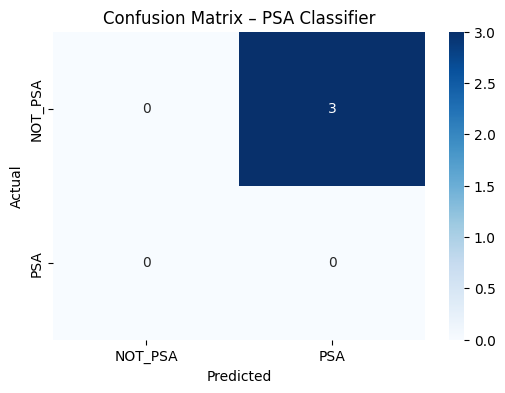

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["NOT_PSA", "PSA"],
    yticklabels=["NOT_PSA", "PSA"]
)
plt.title("Confusion Matrix – PSA Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


ROC Curve

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


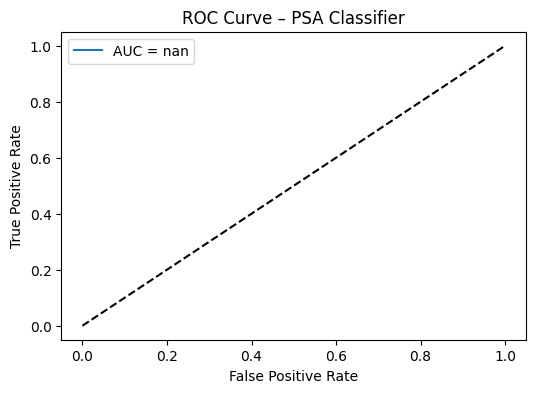

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Use the model's raw logits to get PSA class scores
psa_scores = logits[:, 1]   # column 1 = score for PSA class

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_true, psa_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.title("ROC Curve – PSA Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


Probability Distribution Plot

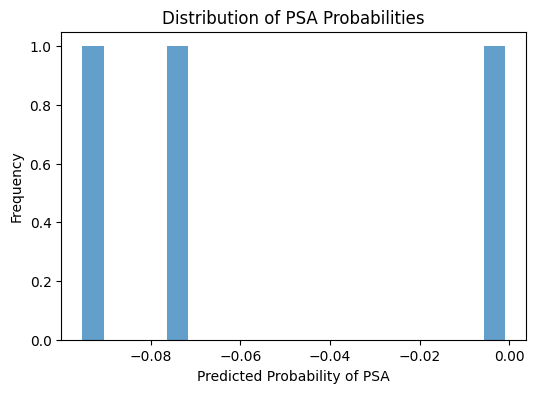

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(psa_scores, bins=20, alpha=0.7)   # no custom color → avoids style issues in Colab
plt.title("Distribution of PSA Probabilities")
plt.xlabel("Predicted Probability of PSA")
plt.ylabel("Frequency")
plt.show()


Use Classifier on Your Additional 1000 Texts

In [ ]:
from transformers import pipeline
import pandas as pd

# ---------- LOAD MODEL ----------
clf = pipeline(
    "text-classification",
    model="psa_classifier",
    tokenizer="psa_classifier",
    top_k=None
)

# ---------- SAFE CLEAN FUNCTION ----------
def clean(text):
    if text is None:
        return ""
    text = str(text)
    text = text.replace("\n", " ").strip()
    return text

# ---------- LOAD NEW DATA ----------
df_new = pd.read_excel("/content/Potential_PSAs.xlsx")

# Ensure text column exists
df_new["text"] = df_new["English_text"].astype(str).apply(clean)

# ---------- RUN CLASSIFIER ONLY ONCE PER ROW ----------
preds = clf(df_new["text"].tolist())

# Convert pipeline outputs to labels + scores
# Access the first element of each inner list (the top prediction)
df_new["prediction"] = [int(p[0]["label"].replace("LABEL_", "")) for p in preds]
df_new["score"]     = [p[0]["score"] for p in preds]

# Optional: map 0/1 to human-friendly labels
df_new["prediction_text"] = df_new["prediction"].map({
    0: "NOT_PSA",
    1: "PSA"
})

df_new.head()

Device set to use cpu


,ID,Subcategory,English_text,text,prediction,score,prediction_text
0,PSAEd0001,Access to Education,We have worked on guidelines to transition our...,We have worked on guidelines to transition our...,1,0.524723,PSA
1,PSAEd0002,Access to Education,"Starting this year, and following extensive st...","Starting this year, and following extensive st...",1,0.510460,PSA
2,PSAEd0003,Access to Education,The Government has not re-introduced cut-off p...,The Government has not re-introduced cut-off p...,1,0.523692,PSA
3,PSAEd0004,Access to Education,The Teachers Service Commission (TSC) will nex...,The Teachers Service Commission (TSC) will nex...,1,0.537887,PSA
4,PSAEd0005,Access to Education,"TSC has also agreed to convert all the 26,000 ...","TSC has also agreed to convert all the 26,000 ...",1,0.533988,PSA


Filter Only Real PSAs

In [ ]:
psas_only = df_new[df_new["prediction"] == 1]
psas_only.to_excel("filtered_psas.xlsx", index=False)

print("Saved filtered_psas.xlsx with only real PSAs")


Saved filtered_psas.xlsx with only real PSAs


Merge the filtered PSAs with the previous main PSAs

In [ ]:
import pandas as pd

# Load the two Excel files
df1 = pd.read_excel("/content/PSA_Eng.xlsx")
df2 = pd.read_excel("/content/filtered_psas.xlsx")

# Combine them row-wise
combined_df = pd.concat([df1, df2], ignore_index=True)

# Save as CSV
combined_df.to_csv("/content/main_dataset.csv", index=False)

print("Done! Saved as main_dataset.csv")
combined_df.head()


Done! Saved as main_dataset.csv


,PSA_ID,Subcategory,English_text,ID,text,prediction,score,prediction_text
0,PSAEd0001,Educational Resources,KNEC has released the 2025 KCSE examination ti...,NaN,NaN,NaN,NaN,NaN
1,PSAEd0002,Access to Education,"Schools reopen on January 6, 2025 for Term 1 o...",NaN,NaN,NaN,NaN,NaN
2,PSAEd0003,Access to Education,Parents must register Grade 6 learners for KPS...,NaN,NaN,NaN,NaN,NaN
3,PSAEd0004,Educational Resources,Download KPSEA sample papers from the KNEC CBA...,NaN,NaN,NaN,NaN,NaN
4,PSAEd0005,Educational Resources,Tune in to EduTV Channel daily from 8:00 AM to...,NaN,NaN,NaN,NaN,NaN


**Translate to Swahili (Hugging Face)**


Translate the text content of the DataFrame into Swahili using a pre-trained Hugging Face model.

In [ ]:
import pandas as pd
from transformers import pipeline

df_english = pd.read_csv('/content/main_dataset.csv')
df_swahili = df_english.copy()

# Initialize the translation pipeline
translator_swahili = pipeline("translation_en_to_sw", model="Helsinki-NLP/opus-mt-en-sw")

# Translate the 'English_text' column and store it in 'Swahili_text'
df_swahili['Swahili_text'] = df_swahili['English_text'].apply(lambda x: translator_swahili(x)[0]['translation_text'])

print("Swahili translation completed. Displaying the first 5 rows with the new 'Swahili_text' column:")
print(df_swahili.head())

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/300M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/300M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/821k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/813k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Device set to use cpu


Swahili translation completed. Displaying the first 5 rows with the new 'Swahili_text' column:
      PSA_ID            Subcategory  \
0  PSAEd0001  Educational Resources   
1  PSAEd0002    Access to Education   
2  PSAEd0003    Access to Education   
3  PSAEd0004  Educational Resources   
4  PSAEd0005  Educational Resources   

                                        English_text  \
0  KNEC has released the 2025 KCSE examination ti...   
1  Schools reopen on January 6, 2025 for Term 1 o...   
2  Parents must register Grade 6 learners for KPS...   
3  Download KPSEA sample papers from the KNEC CBA...   
4  Tune in to EduTV Channel daily from 8:00 AM to...   

                                        Swahili_text  
0  KNEC imetoa ratiba ya uchunguzi ya 2025 KCS kw...  
1  Shule zimefunguliwa upya Januari 6, 2025 kwa k...  
2  Ni lazima wazazi wasajiliwe Grade 6 wenye kuji...  
3  Pakua karatasi za sampuli za KPNEEA kutoka kwe...  
4  Kila siku, Tune in to EduTV Mlangobahari wa ki...  


## Install/Ensure Googletrans for Somali

* Install `googletrans` (or ensure the correct stable version is installed) which will be used for Somali translation.


In [ ]:
import sys

!{sys.executable} -m pip uninstall -y googletrans
!{sys.executable} -m pip install googletrans==4.0.0-rc1

print("googletrans installation/check complete.")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17455 sha256=096e729c9a93b5e702c5cfe80cf201b574239ab5dd1571aa5d126a3c267d3115
  Stored in directory: /root/.cache/pip/wheels/95/0f/04/b17a72024b56a60e499ce1a6313d283ed5ba332407155bee03
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

* Translate the 'English_text' column into Somali.
* Create a new DataFrame, `df_somali`, by copying `df_english`, and then apply the translation to populate a new 'Somali_text' column.



In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
import pandas as pd

# Load the dataset
df_somali = df_english.copy()

# Load NLLB model + tokenizer
model_name = "facebook/nllb-200-distilled-600M"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

translator_somali = pipeline(
    "translation",
    model=model,
    tokenizer=tokenizer,
    src_lang="eng_Latn",
    tgt_lang="som_Latn",
    max_length=512
)

# Translate function
def translate_text_nllb(text):
    if pd.isna(text) or not isinstance(text, str):
        return None
    try:
        return translator_somali(text)[0]["translation_text"]
    except Exception as e:
        return f"Translation Error: {e}"

# Apply translation
df_somali["Somali_text"] = df_somali["English_text"].apply(translate_text_nllb)

print(df_somali.head())


tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

Device set to use cpu


## Combined DF

* Add the existing Somali translations to the DataFrame containing the Swahili translations to create a single combined DataFrame.


In [ ]:
df_swahili['Somali_text'] = df_somali['Somali_text']

print("Combined DataFrame with Swahili and Somali translations. Displaying the first 5 rows:")
print(df_swahili.head())

## Save Combined Translated Data

* Save the DataFrame containing the original English text, Swahili translations, and Somali translations to a single new CSV file.


In [ ]:
import pandas as pd

df_english = pd.read_excel('/content/PSA_Cleaned.csv')

df_swahili.to_csv('PSA_Translated_Combined.csv', index=False)


print("Combined translated data saved to 'PSA_Translated_Combined.csv' successfully.")

## Authenticate Google Drive

* Authenticate access to Google Drive to enable uploading the translated file.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
print("Google Drive authentication initiated. Follow the prompts to complete.")

In [ ]:
import shutil
import os

source_path = 'PSA_Translated_Combined.csv'
destination_path = '/content/gdrive/MyDrive/'

# Ensure the destination directory exists (it should, after mounting)
if not os.path.exists(destination_path):
    os.makedirs(destination_path)

shutil.copy(source_path, destination_path)

print(f"'PSA_Translated_Combined.csv' successfully uploaded to {destination_path}")